By Drilon & Chia-Hua

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh', input_shape=(28,28,1)),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='tanh'),
  keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

In [7]:
log = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 138s 182ms/step - loss: 0.4102 - accuracy: 0.8508 - val_loss: 0.3530 - val_accuracy: 0.8721
Epoch 2/10
750/750 [==============================] - 147s 196ms/step - loss: 0.2709 - accuracy: 0.9018 - val_loss: 0.2581 - val_accuracy: 0.9056
Epoch 3/10
750/750 [==============================] - 142s 189ms/step - loss: 0.2193 - accuracy: 0.9206 - val_loss: 0.2540 - val_accuracy: 0.9061
Epoch 4/10
750/750 [==============================] - 145s 194ms/step - loss: 0.1829 - accuracy: 0.9330 - val_loss: 0.2313 - val_accuracy: 0.9160
Epoch 5/10
750/750 [==============================] - 144s 192ms/step - loss: 0.1538 - accuracy: 0.9447 - val_loss: 0.2494 - val_accuracy: 0.9110
Epoch 6/10
750/750 [==============================] - 138s 184ms/step - loss: 0.1285 - accuracy: 0.9522 - val_loss: 0.2291 - val_accuracy: 0.9195
Epoch 7/10
750/750 [==============================] - 131s 175ms/step - loss: 0.1017 - accuracy: 0.9638 - val_loss: 0.2395 -

In [8]:
def plot_training(model_log):
  f = plt.figure(figsize=(12,4))
  ax1 = f.add_subplot(121)
  ax2 = f.add_subplot(122)
  ax1.plot(model_log.history['loss'], label='Training loss')
  ax1.plot(model_log.history['val_loss'], label='Testing loss')
  ax1.legend()
  ax1.grid()
  ax2.plot(model_log.history['accuracy'], label='Training acc')
  ax2.plot(model_log.history['val_accuracy'], label='Testing acc')
  ax2.legend()
  ax2.grid()

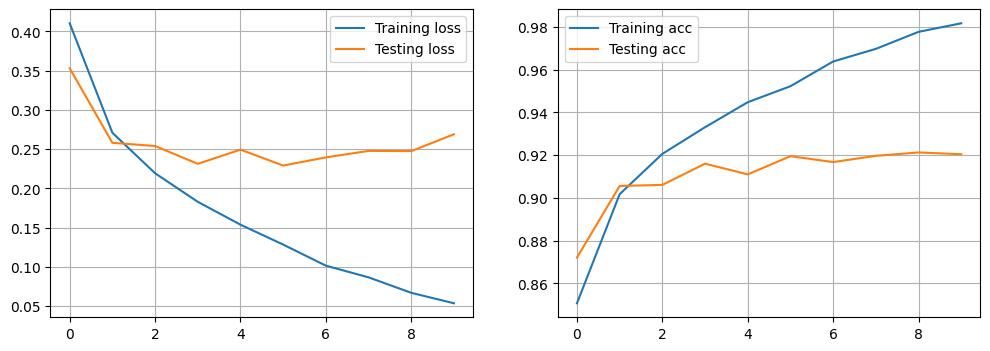

In [11]:
plot_training(log)

## Trying out some different weight and bias initializers

Epoch 1/10
750/750 [==============================] - 144s 189ms/step - loss: 0.4016 - accuracy: 0.8543 - val_loss: 0.2779 - val_accuracy: 0.8944
Epoch 2/10
750/750 [==============================] - 140s 187ms/step - loss: 0.2614 - accuracy: 0.9050 - val_loss: 0.2454 - val_accuracy: 0.9074
Epoch 3/10
750/750 [==============================] - 138s 183ms/step - loss: 0.2151 - accuracy: 0.9201 - val_loss: 0.2298 - val_accuracy: 0.9150
Epoch 4/10
750/750 [==============================] - 132s 176ms/step - loss: 0.1808 - accuracy: 0.9339 - val_loss: 0.2456 - val_accuracy: 0.9093
Epoch 5/10
750/750 [==============================] - 131s 175ms/step - loss: 0.1550 - accuracy: 0.9436 - val_loss: 0.2343 - val_accuracy: 0.9171
Epoch 6/10
750/750 [==============================] - 132s 177ms/step - loss: 0.1306 - accuracy: 0.9518 - val_loss: 0.2140 - val_accuracy: 0.9237
Epoch 7/10
750/750 [==============================] - 137s 182ms/step - loss: 0.1071 - accuracy: 0.9611 - val_loss: 0.2395 -

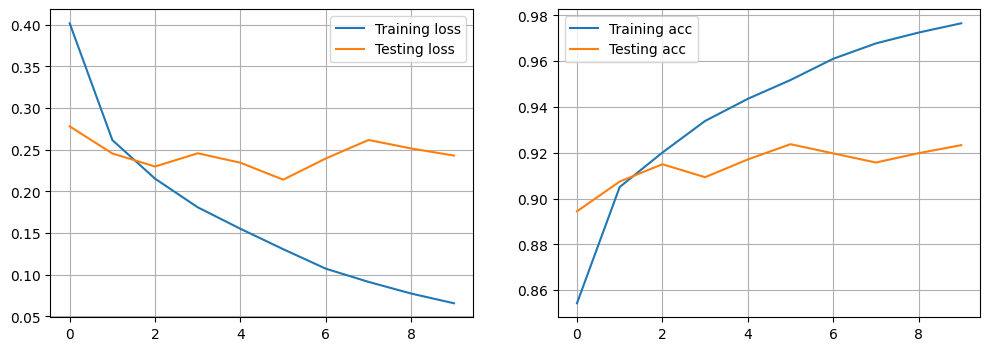

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh', input_shape=(28, 28, 1),
                  kernel_initializer='he_normal', bias_initializer='zeros'), # default kernel_initializer for Conv2d is glorot_uniform, bias_initializer is default zeros
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer='he_normal', bias_initializer='zeros'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer='he_normal', bias_initializer='zeros'),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer='he_normal', bias_initializer='zeros'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log2 = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)
plot_training(log2)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
750/750 [==============================] - 129s 170ms/step - loss: 2.3493 - accuracy: 0.0992 - val_loss: 2.3341 - val_accuracy: 0.1003
Epoch 2/10
750/750 [==============================] - 129s 172ms/step - loss: 2.3262 - accuracy: 0.0976 - val_loss: 2.3252 - val_accuracy: 0.1027
Epoch 3/10
750/750 [==============================] - 130s 173ms/step - loss: 2.3244 - accuracy: 0.1003 - val_loss: 2.3355 - val_accuracy: 0.1030
Epoch 4/10
750/750 [==============================] - 127s 170ms/step - loss: 2.3228 - accuracy: 0.0983 - val_loss: 2.3185 - val_accuracy: 0.0983
Epoch 5/10
750/750 [==============================] - 132s 176ms/step - loss: 2.3230 - accuracy: 0.1002 - val_loss: 2.3494 - val_accuracy: 0.0983
Epoch 6/10
750/750 [==============================] - 127s 170ms/step - loss: 2.3218 - accuracy: 0.1006 - val_loss: 2.3297 - val_accuracy: 0.0983
Epoch 7/10
750/750 [==============================] - 129s 172ms/step - loss: 2.3263 - accuracy: 0.1002 - val_loss: 2.3247 -

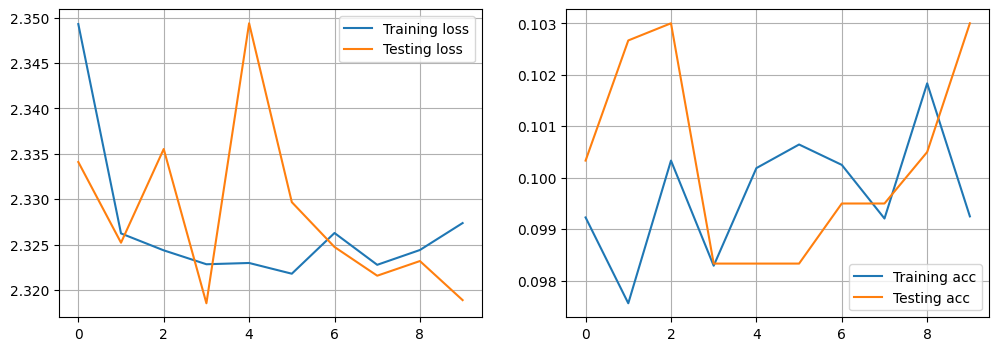

In [14]:
initializer = keras.initializers.RandomUniform(minval=0.0, maxval=1.0)
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh', input_shape=(28, 28, 1),
                  kernel_initializer=initializer, bias_initializer='Zeros'),
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer=initializer, bias_initializer='Zeros'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer=initializer, bias_initializer='Zeros'),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh',
                  kernel_initializer=initializer, bias_initializer='Zeros'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='Zeros'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='Zeros')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log3 = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)
plot_training(log3)

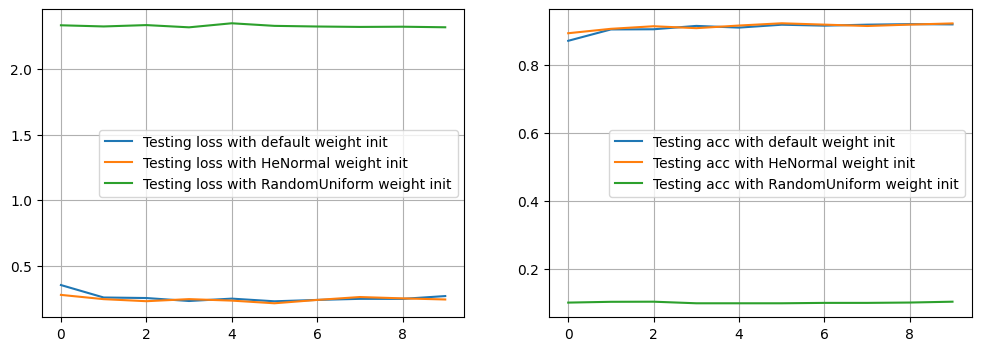

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(log.history['val_loss'], label='Testing loss with default weight init')
ax1.plot(log2.history['val_loss'], label='Testing loss with HeNormal weight init')
ax1.plot(log3.history['val_loss'], label='Testing loss with RandomUniform weight init')
ax1.legend()
ax1.grid()

ax2.plot(log.history['val_accuracy'], label='Testing acc with default weight init')
ax2.plot(log2.history['val_accuracy'], label='Testing acc with HeNormal weight init')
ax2.plot(log3.history['val_accuracy'], label='Testing acc with RandomUniform weight init')
ax2.legend()
ax2.grid()

In this experiment, the models initialized with HeNormal and default weights demonstrated comparable and superior performance over those with RandomUniform initialization. The RandomUniform's bad results align with theoretical expectations, as it does not account for layer size, leading to potential gradient scaling issues. Uniform initialization distributes weights too uniformly without scaling by layer dimensions, which can cause a model to struggle with learning, as can be seen our test run.